From the power point we have seen that the logistic equation is

$$ y = \frac{1}{1 + e^{-(mx+b)}} $$

let $z = mx+b $ 

The loss function for logistic regression is

$ L = \sum( -y_i log(\hat{y_i}) - (1 - y_i) log(1 - \hat{y_i}) )$

the update equation for $m$ and $b$ with $\epsilon$ as a learning rate are:

$m = m - \epsilon \frac{\partial L}{\partial m} $

$b = b - \epsilon \frac{\partial L}{\partial b} $

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sbn
%matplotlib inline

In [3]:
df = pd.read_csv("Titanic.csv")

In [4]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
print(df.shape)

(891, 12)


In [6]:
df["family_size"] = df["SibSp"] + df["Parch"] + 1

In [7]:
print(df["Parch"].head())
print("+++++++++++++")
print(df["SibSp"].head())

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64
+++++++++++++
0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64


In [8]:
print(df["family_size"].head())

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64


In [9]:
print(df["Embarked"].unique())

['S' 'C' 'Q' nan]


In [10]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
dtype: int64


In [11]:
df["Age"].fillna(value=df["Age"].median(), inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
dtype: int64

In [12]:
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [13]:
df["Embarked"].fillna(value="S", inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
family_size      0
dtype: int64

In [14]:
embarked ={"S":0, "C":1, "Q":2}

In [15]:
df.Embarked = [embarked[item] for item in df.Embarked]

In [16]:
gender ={"female":1, "male":0}

In [17]:
df.Sex = [gender[item] for item in df.Sex]

In [32]:
dfx = df[["Age", "Sex", "family_size", "Embarked", "Fare"]].copy(deep=True)
dfy = df[["Survived"]].copy(deep=True)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
x = scaler.fit_transform(dfx)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size = 0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [36]:
print(y_train.shape)
y_train = np.array(y_train).flatten()
print(y_train.shape)

(712, 1)
(712,)


In [37]:
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
ypred = model.predict(x_test)

#### Confusion Matrix

Is a table that gives a visual representation of performance of a classification. Each row in the table represents the instances in an actual class and each column represents the instances in a predicted class. Rows and columns can be interchanged.  

<img src ="confusion_matrix.png", width = 300, height = 200>

#### False Positive is known as Type I error and False Negative is known as Type II error. 

Let's consider another matrix and compute come metrics

<img src ="confusion_matrix2.png", width = 500, height = 400>

Important metrics

Recall = Sensitivity = True Positive rate = $\frac{TP}{TP+FN}$ 

Precision = Positive Predictive Value = $\frac{TP}{TP+FP} $  

Accuracy = $ \frac{TP+TN}{TP+TN+FP+FN} $

Specificity = True Negative rate = $ \frac{TN}{FP+TN} $ 

False Positive Rate = $\frac{FP}{FP+TN} $  = 1 - TNR = 1 - Specificity  

F1 score is an harmonic mean of Recall and Precision, 
F1 = $\frac{2*Precision*Recall}{Precision+Recall} $



Receiver Operating Characteristic curve, ROC curve is computed by plotting the True Positive Rate (TPR) with False Positive Rate (FPR) for different thresholds. 

<img src ="ROC_curves.svg", width = 400, height = 300>


Area Under the Receciver Operating Characteristic Curve, AUCROC, measures the separability of classes. Area close to 1 means the classes are properly classified. AUC under 0.5 means the classification is not good. 

Images courtesy of Wiki

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred)

array([[90, 15],
       [23, 51]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
print("Base rate accuracy is: %0.2f" %(accuracy_score(y_test, ypred)))

Base rate accuracy is: 0.79


In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [42]:
logit_roc_auc = roc_auc_score(y_test, ypred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, ypred))

Logistic AUC = 0.77
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [43]:
from sklearn.metrics import roc_curve
b = model.predict_proba(x_test)[:,1]
print(b[0:5])
fpr, tpr, threshold = roc_curve(y_test, b)

[0.12292248 0.17758356 0.2015689  0.81035832 0.74471646]


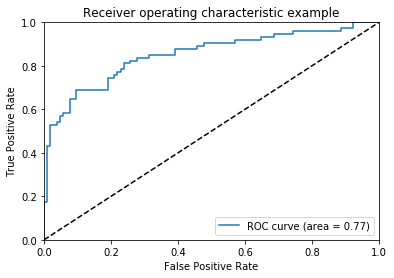

In [44]:
# plotting ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [45]:
"""
In-class activity: Include Fare feature and fit a logistic regression. 
Calculate precision, recall and F1-score. Then plot ROC curve.
"""

'\nIn-class activity: Include Fare feature and fit a logistic regression. \nCalculate precision, recall and F1-score. Then plot ROC curve.\n'